In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
pc2mean = df_train['Product_Category_2'].mean()
pc3mean = df_train['Product_Category_3'].mean()

In [9]:
df_train.groupby('Marital_Status')['Gender'].count()

Marital_Status
0    324731
1    225337
Name: Gender, dtype: int64

In [10]:
df_train.groupby('Gender')['Marital_Status'].sum()

Gender
F     56988
M    168349
Name: Marital_Status, dtype: int64

In [11]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
df_train = df_train.fillna(0)

In [14]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [16]:
gender = np.unique(df_train['Gender'])
gender

array(['F', 'M'], dtype=object)

In [17]:
## Mapping gender Male 'M' as 1 and Female 'F' as 0

def map_gender(gender):
    if gender=='M':
        return 1
    else:
        return 0
df_train['Gender']=df_train['Gender'].apply(map_gender)

In [18]:
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
## Mapping age ranges into numerical values

def map_age(age):
    if age == '0-17':
        return 0 
    if age == '18-25':
        return 1
    if age == '26-35':
        return 2
    if age == '36-45':
        return 3
    if age == '46-50':
        return 4
    if age == '55+':
        return 5
    else:
        return 6
df_train['Age'] = df_train['Age'].apply(map_age)    
        

In [20]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
def map_city_category(city_category):
    if city_category == 'A':
        return 2
    if city_category == 'B':
        return 1
    else:
        return 0
df_train['City_Category']=df_train['City_Category'].apply(map_city_category)

In [22]:
cols = ['User_ID','Product_ID']
df_train.drop(cols, inplace=True, axis=1)

In [23]:
cols1 = ['User_ID','Product_ID']
df_test.drop(cols1, inplace=True, axis=1)

In [24]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,5,16,0,4+,0,8,0.0,0.0,7969


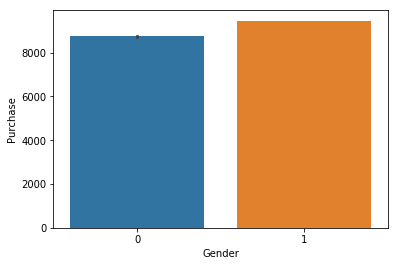

In [25]:
sns.barplot('Gender','Purchase',data=df_train)

## male purchase more as seen below

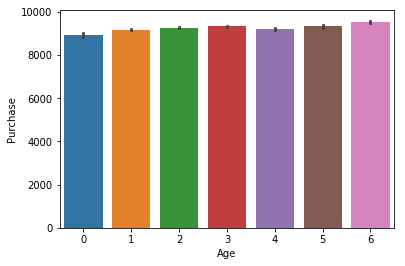

In [26]:
sns.barplot('Age','Purchase',data=df_train)

## age does not effect much on purchasing 

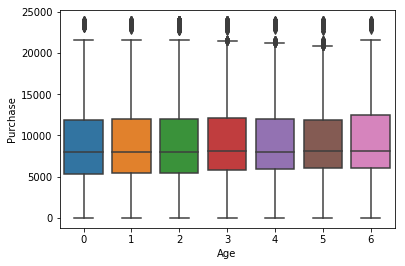

In [27]:
sns.boxplot('Age','Purchase',data=df_train)

#### Inference
Not much deviation is found in different age groups during black friday purchasing since the rate is cheap and everyone purchase to their full extent.

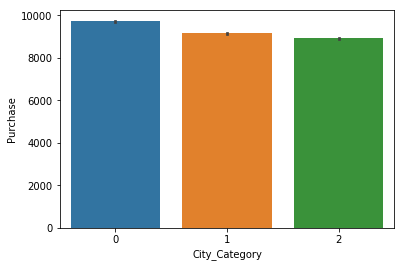

In [28]:
sns.barplot('City_Category','Purchase',data=df_train)

#### Inference-
cities falling under city_category 0 have slightly high purchase power than cities in city_category 1 and 2

In [29]:
df_train.corr()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.005886,0.117291,0.004515,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,-0.005886,1.000000,0.086699,-0.115022,0.315550,0.058331,0.019071,-0.006275,0.017357
Occupation,0.117291,0.086699,1.000000,-0.034479,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,0.004515,-0.115022,-0.034479,1.000000,-0.039790,0.014364,-0.016003,-0.035525,-0.061914
Marital_Status,-0.011603,0.315550,0.024280,-0.039790,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.045594,0.058331,-0.007618,0.014364,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,-0.000954,0.019071,0.006712,-0.016003,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.036146,-0.006275,0.012269,-0.035525,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.060346,0.017357,0.020833,-0.061914,-0.000463,-0.343703,0.052288,0.288501,1.000000


In [30]:
pc1mean = df_train['Product_Category_1'].mean()
pc2mean = df_train['Product_Category_2'].mean()
pc3mean = df_train['Product_Category_3'].mean()

In [31]:
print(pc1mean)
print(pc2mean)
print(pc3mean)

5.404270017525106
6.735436346051761
3.841941359977312


In [32]:
y = df_train['Purchase']

In [33]:
df_train.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [34]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,5,16,0,4+,0,8,0.0,0.0,7969


In [35]:
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [36]:
df_train.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [37]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,5,16,0,4+,0,8,0.0,0.0,7969


In [38]:
df_train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train = pd.get_dummies(df_train)
x = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,accuracy_score

In [42]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
xgb=XGBRegressor(n_estimators=500)

### Linear Regressor

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [44]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
pred_lr = lr.predict(x_test)

In [46]:
lr.score(x_train, y_train)

0.15223061822056216

In [47]:
lr.score(x_test, y_test)

0.15231943543020576

### RandomForest Regressor

In [49]:
rf.fit(x_train, y_train)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
pred_rf = rf.predict(x_test)

In [51]:
rf.score(x_train, y_train)

0.7885866683256847

In [52]:
rf.score(x_test, y_test)

0.6225327716395973

In [54]:
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_rf)))

RMSE: 3089.9194734904077


### XGB Regressor

In [55]:
xgb.fit(x_train, y_train)

C:\Users\amprl\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:55:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [56]:
pred_xgb = xgb.predict(x_test)

In [57]:
xgb.score(x_train, y_train)

0.6599280634270503

In [58]:
xgb.score(x_test, y_test)

0.6610640684001521